# DBDA.X408 Python Tutorial

In this tutorial we cover

* [Basic Python](#Basic-Python)
   * [If Statement](#If-Statement)
   * [Python Operators](#Python-Operators)
   * [Loops](#Loop)
   * [Functions](#Function)
* [Simple python data type](#Simple-Python-data-types)
   * [String](#String)
   * [List](#List)
   * [Tuple](#Tuple)
   * [Set/Dictionary](#Dictionary/Set)
* [Numpy](#Numpy)
   * [Array (matrix) initialization](#Array-initialization)
   * [Shape](#Array-shape)
   * [Math with numpy](#Numpy-math)
* [Dimension manipulation and broadcasting](#Broadcasting-and-dimension-manipulation)
    * [Tile](#Tile)
    * [Squeeze/expand_dims](#Expand/Squeeze)
    * [Example: compute pairwise distance](#Pairwise-distance)
* [Vectorization](#Vectorization)
    * [Example: dot product](#Dot-product)
    * [Exmaple: 2d matrix multiplication](#Matrix-multiplication-(2D))
    * [Exmaple: pairwise distance, again](#Pairwise-distance,-again)
* [Plotting](#Matplotlib)
    * [Simple plotting (line, scatter)](#Simple-plotting)
    * [Confusion matrix](#Confusion-matrix)
    * [Show images](#Show-image)
* [Pandas](#Pandas)
    * [Load/Save](#File-operations)
    * [Manipulations](#Manipulations)
    * [Create from scratch](#Create-dataframe)
    * [Plotting](#Simple-plotting)

## Basic Python

### If Statement

In [ ]:
code = 408

In [ ]:
if code == 408:
    print('Hello from 408!')
elif code < 408:
    print('That is some undergraduate class')
else:
    print('Wrong class!')

Wrong class!


Python doesn't have "switch" statement.

### Python Operators

**Logical operators**

In [ ]:
true = True
false = False

In [ ]:
if true:
    print("It's true!")

if not false:
    print("It's still true!")

if true and not false:
    print("Anyhow, it's true!")

if false or not true:
    print("True?")

else:
    print("Okay, it's false now....")


It's true!
It's still true!
Anyhow, it's true!
Okay, it's false now....


**&, | and ~ are all bitwise operators**

^ means bitwise XOR in Python.

In [ ]:
# 00001 --> 1
# 00010 -->2

1

**Arithmetic operators**

In [ ]:
print(5 / 2) # floating number division
print(5 % 2) # remainder
print(5 ** 2) # exponentiation
print(5 // 2) # integer division

2.5
1
25
2


### Loop

We typically use *range* and *enumerate* for iterations. You can loop over all iterables.

In [ ]:
for i in range(5):
    print(i)

0
1
2
3
4


In [ ]:
a = 5
while a > 0:
    print(a)
    a -= 1

5
4
3
2
1


Python doesn't have command like "a++" or "a--".

### Function

Python functions can take default arguments, they have to be at the end. Be VERY careful because forgetting that you have default argument can prevent you from debugging effectively.

In [ ]:
def power(v, p=2):
    return v ** p # How to return multiple values?

print(power(10))
print(power(10, 3))

100
1000


Functions can support extra arguments. You can pass them on to another function, or make use of these directly.

- args: variable number of non-keyworded arguments
- kwargs: variable number of keyworded arguments

In [ ]:
def func2(*args, **kwargs):
    print(args)
    print(kwargs)


In [ ]:
def func1(v, *args, **kwargs):

    func2(*args, **kwargs)

    if 'power' in kwargs:
        return v ** kwargs['power']
    else:
        return v

print(func1(10, 'extra 1', 'extra 2', power=3))
print('--------------')
print(func1(10, 5))

('extra 1', 'extra 2')
{'power': 3}
1000
--------------
(5,)
{}
10


**Good practice:**
- write out argument name and their value

## Simple Python data types

### String
See Python documentation [here](https://docs.python.org/3/library/string.html)

In [ ]:
cs_class_code = 229

In [ ]:
# Concatenation

print('I like CS ' + str(cs_class_code) + ' a lot!')
print(f'I like CS {cs_class_code} a lot!')

In [ ]:
# Formatting

print('I love CS229. (upper)'.upper())
print('I love CS229. (rjust 50)'.rjust(50))
print('we love CS229. (capitalize)'.capitalize())
print('       I love CS229. (strip)        '.strip())

I LOVE CS229. (UPPER)
                          I love CS229. (rjust 50)
We love cs229. (capitalize)
I love CS229. (strip)


"f"-string (f for formatting?) is new since Python 3.6. Embed values using { }

In [ ]:
print(f'{print} (print a function)')
print(f'{type(229)} (print a type)')

<built-in function print> (print a function)
<class 'int'> (print a type)


For reference, here is how people used to do things. Or you want more control.

In [ ]:
print('Old school formatting: {2}, {1}, {0:10.2F}'.format(1.358, 'b', 'c'))
# Fill in order of 2, 1, 0. For the decimal number, fix at length of 10, round to 2 decimal places

Old school formatting: c, b,       1.36


### List
In general, data structure documentations can be found [here](https://docs.python.org/3/tutorial/datastructures.html)

In [ ]:
list_1 = ['one', 'two', 'three']
list_2 = [1, 2, 3]

In [ ]:
print(list_1)
print(list_2)

['one', 'two', 'three']
[1, 2, 3]


In [ ]:
list_2.append(4)

In [ ]:
list_2

[1, 2, 3, 4]

In [ ]:
list_2.insert(0, 'ZERO')

In [ ]:
list_2 # if you go back to the previous cell and run print(list_2) again, what will you see?

['ZERO', 1, 2, 3, 4]

List extension is just addition

In [ ]:
print(list_1 + list_2)

list_1_temp = ['a', 'b']
list_1_temp.extend(list_2)

print(list_1_temp)

['one', 'two', 'three', 'ZERO', 1, 2, 3, 4]
['a', 'b', 'ZERO', 1, 2, 3, 4]


But be VERY careful when you multiply a list!!

In [ ]:
print(list_1 * 3 + list_2)
print([list_1] * 3 + list_2)

['one', 'two', 'three', 'one', 'two', 'three', 'one', 'two', 'three', 'ZERO', 1, 2, 3, 4]
[['one', 'two', 'three'], ['one', 'two', 'three'], ['one', 'two', 'three'], 'ZERO', 1, 2, 3, 4]


**pprint** is your friend

In [ ]:
import pprint as pp

In [ ]:
pp.pprint([list_1] * 5 + list_2)
pp.pprint([list_1] * 2 + [list_2] * 3)

[['one', 'two', 'three'],
 ['one', 'two', 'three'],
 ['one', 'two', 'three'],
 ['one', 'two', 'three'],
 ['one', 'two', 'three'],
 'ZERO',
 1,
 2,
 3,
 4]
[['one', 'two', 'three'],
 ['one', 'two', 'three'],
 ['ZERO', 1, 2, 3, 4],
 ['ZERO', 1, 2, 3, 4],
 ['ZERO', 1, 2, 3, 4]]


**List comprehension can save a lot of lines**

In [ ]:
long_list = [i for i in range(9)]
long_long_list = [(i, j) for i in range(3) for j in range(5)]
long_list_list = [[i for i in range(3)] for _ in range(5)]

pp.pprint(long_list)
pp.pprint(long_long_list)
pp.pprint(long_list_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4)]
[[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]


List is **iterable**!

In [ ]:
string_list = ['a', 'b', 'c']

In [ ]:
for s in string_list:
    print(s)

In [ ]:
for i, s in enumerate(string_list):
    print(f'{i}, {s}')

Slicing. With numpy array (covered layter), you can do this to multi-dimensional ones as well.

In [ ]:
print(long_list[:5])
print(long_list[:-1])
print(long_list[4:-1])

long_list[3:5] = [-1, -2]
print(long_list)

long_list.pop()
print(long_list)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7]
[4, 5, 6, 7]
[0, 1, 2, -1, -2, 5, 6, 7, 8]
[0, 1, 2, -1, -2, 5, 6, 7]


Sorting a list (but remember that sorting can be costly). Documentation for sorting is [here](https://docs.python.org/3/howto/sorting.html)

In [ ]:
random_list = [3, 12, 5, 6, 8, 2]
print(sorted(random_list))

random_list_2 = [(3, 'z'), (12, 'r'), (5, 'a'), (6, 'e'), (8, 'c'), (2, 'g')]
print(sorted(random_list_2, key=lambda x: x[1])) # sorting using 2nd variable in tuple

[2, 3, 5, 6, 8, 12]
[(5, 'a'), (8, 'c'), (6, 'e'), (2, 'g'), (12, 'r'), (3, 'z')]


**Think first before copying** Copy by reference not by value. More about copying [here](https://docs.python.org/3/library/copy.html)

In [ ]:
orig_list = [[1, 2], [3, 4]]
dup_list = orig_list

dup_list[0][1] = 'okay'
pp.pprint(orig_list)
pp.pprint(dup_list)

[[1, 'okay'], [3, 4]]
[[1, 'okay'], [3, 4]]


In [ ]:
a = [[1, 2, 3]]*3
b = [[1, 2, 3] for i in range(3)]
a[0][1] = 4
b[0][1] = 4
print(a)
print(b)

[[1, 4, 3], [1, 4, 3], [1, 4, 3]]
[[1, 4, 3], [1, 2, 3], [1, 2, 3]]


In [ ]:
import copy

In [ ]:
orig_list = [[1, 2], [3, 4]]
dup_list = copy.deepcopy(orig_list)

dup_list[0][1] = 'okay'
pp.pprint(orig_list)
pp.pprint(dup_list)

### Tuple

List that you **cannot** edit.

In [ ]:
my_tuple = (10, 20, 30)
my_tuple[0] = 40

TypeError: ignored

Split assignment makes your code shorter (also works for list).

In [ ]:
a, b, c = my_tuple
print(f"a={a}, b={b}, c={c}")
for obj in enumerate(my_tuple):
    print(obj)

a=10, b=20, c=30
(0, 10)
(1, 20)
(2, 30)


### Dictionary/Set

Again, documentation for data structure is [here](https://docs.python.org/3/tutorial/datastructures.html)

In [ ]:
my_set = {i ** 2 for i in range(10)}
print(my_set)

# unordered, unique

In [ ]:
my_set_temp = {i ** 2 % 5 for i in range(10)}
print(my_set_temp)

{0, 1, 4}


In [ ]:
my_dict = {(5 - i): i ** 2 for i in range(10)}

print(my_dict)
print(my_dict.keys())

{5: 0, 4: 1, 3: 4, 2: 9, 1: 16, 0: 25, -1: 36, -2: 49, -3: 64, -4: 81}
dict_keys([5, 4, 3, 2, 1, 0, -1, -2, -3, -4])


Updating and/or addint content to a dictionary

In [ ]:
second_dict = {'a': 10, 'b': 11}
my_dict.update(second_dict)

pp.pprint(my_dict)

In [ ]:
my_dict['new'] = 10
pp.pprint(my_dict)

Here is how to iterate through a dictionary. And remember that dictionary is NOT sorted by key value.

In [ ]:
for k, it in my_dict.items(): # similar to for loop over enumerate(list)
    print(k, it)

In [ ]:
# Sorting keys by string order
for k, it in sorted(my_dict.items(), key=lambda x: str(x[0])):
    print(k, it)

For *defaultdict* and sorted dictionary, see the [collections documentation](https://docs.python.org/3/library/collections.html)

## Numpy

[Numpy](https://numpy.org/) is a nice vector and matrix manipulation package.

In [ ]:
import pprint as pp

In [ ]:
import numpy as np

### Array initialization

Initialize from existing list. If type is not consistent, numpy will give you weird result.

In [ ]:
from_list = np.array([1, 2, 3])
pp.pprint(from_list)
print(f'\t Data type of integer is {from_list.dtype}')

array([1, 2, 3])
	 Data type of integer is int64


In [ ]:
from_list_2d = np.array([[1, 2, 3.0], [4, 5, 6]])
pp.pprint(from_list_2d)
print(f'\t Data type of float is {from_list_2d.dtype}')

array([[1., 2., 3.],
       [4., 5., 6.]])
	 Data type of float is float64


In [ ]:
from_list_bad_type = np.array([1, 2, 3, 'a'])
pp.pprint(from_list_bad_type)

array(['1', '2', '3', 'a'], dtype='<U21')


Initialize with ones, zeros, or as identity matrix

In [ ]:
print(np.ones(3))

[1. 1. 1.]


In [ ]:
print(np.ones((3, 3)))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
print(np.zeros(3))

[0. 0. 0.]


In [ ]:
print(np.zeros((3, 3)))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Sampling over uniform distribution on $[0, 1)$.

In [ ]:
print(np.random.random(3))

[0.59882121 0.42557931 0.92337334]


In [ ]:
print(np.random.random((2, 2)))

[[0.34553312 0.46848415]
 [0.37037445 0.40410034]]


Sampling over standard normal distribution.

In [ ]:
print(np.random.randn(3, 3))

[[ 0.3993716  -0.52596311  2.78457593]
 [-0.83160889  0.09791922 -0.67776428]
 [-1.69918914  0.67065558 -0.7671557 ]]


Numpy has built-in samplers of a lot of other common (and some not so common) distributions.

### Array shape

Shape/reshape and multi-dimensional arrays

In [ ]:
array_1d = np.array([1, 2, 3, 4])
array_1by4 = np.array([[1, 2, 3, 4]])
array_2by4 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

# print(array_1d.shape)
# print(array_1by4.shape)
# pp.pprint(array_1d.reshape(-1, 4))
# print(array_1d.reshape(-1, 4).shape)

print(array_2by4.size) # projects: pytorch -- size similar to numpy shape

8


In [ ]:
large_array = np.array([i for i in range(9)])
large_array = large_array.reshape((3, 3))

pp.pprint(large_array)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])


In [ ]:
large_3d_array = np.array([i for i in range(1000)])
large_3d_array = large_3d_array.reshape((10, 10, 10))

In [ ]:
print(large_3d_array[:, 1, 1])

[ 11 111 211 311 411 511 611 711 811 911]


In [ ]:
print(large_3d_array[2, :, 1])

[201 211 221 231 241 251 261 271 281 291]


In [ ]:
print(large_3d_array[2, 3, :])

[230 231 232 233 234 235 236 237 238 239]


In [ ]:
print(large_3d_array[1, :, :])

[[100 101 102 103 104 105 106 107 108 109]
 [110 111 112 113 114 115 116 117 118 119]
 [120 121 122 123 124 125 126 127 128 129]
 [130 131 132 133 134 135 136 137 138 139]
 [140 141 142 143 144 145 146 147 148 149]
 [150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169]
 [170 171 172 173 174 175 176 177 178 179]
 [180 181 182 183 184 185 186 187 188 189]
 [190 191 192 193 194 195 196 197 198 199]]


Think about the **order** you need before using reshape.

In [ ]:
small_array = np.arange(4)
small_array

array([0, 1, 2, 3])

In [ ]:
print(np.reshape(small_array, (2, 2), order='C')) # Default order

[[0 1]
 [2 3]]


In [ ]:
print(np.reshape(small_array, (2, 2), order='F'))

[[0 2]
 [1 3]]


### Numpy math

This also works for sin, cos, tanh, etc.

In [ ]:
array_1 = np.array([1, 2, 3, 4])

# element wise operations!!

print(array_1 + 5)
print(array_1 * 5)
print(np.sqrt(array_1))
print(np.power(array_1, 2))
print(np.exp(array_1))
print(np.log(array_1))

[6 7 8 9]
[ 5 10 15 20]
[1.         1.41421356 1.73205081 2.        ]
[ 1  4  9 16]
[ 2.71828183  7.3890561  20.08553692 54.59815003]
[0.         0.69314718 1.09861229 1.38629436]


For sum, mean, avg, std, var, etc, you can perform the operation on set axis.

In [ ]:
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

pp.pprint(array_2d)
print(f'shape={array_2d.shape}')
print(np.sum(array_2d))
print(np.sum(array_2d, axis=0))
print(np.sum(array_2d, axis=1))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])
shape=(3, 3)
45
[12 15 18]
[ 6 15 24]


In [ ]:
array_3d = np.array([i for i in range(8)]).reshape((2, 2, 2))
pp.pprint(array_3d)

print(np.sum(array_3d, axis=0))
print(np.sum(array_3d, axis=1))
print(np.sum(array_3d, axis=(1, 2)))

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])
[[ 4  6]
 [ 8 10]]
[[ 2  4]
 [10 12]]
[ 6 22]


Numpy tend to do things element-wise. But be **VERY CAREFUL** when dimensions don't match. We will cover this in broadcasting. Actuall just be careful with dimension of arrays in general.

In [ ]:
array_1 = np.array([1, 2, 3, 4])
array_2 = np.array([3, 4, 5, 6])

In [ ]:
print(array_1 * array_2) # element wise multiplication

[ 3  8 15 24]


In [ ]:
# same as np.multiply

In [ ]:
print(np.multiply(array_1, array_2))

[ 3  8 15 24]


In [ ]:
print(array_2.reshape(4, -1))

In [ ]:
print(array_2.shape)
print(array_2.reshape(4, -1).shape)

In [ ]:
print(array_1 * array_2.reshape(4, -1)) # Come back to this later

Dot product can be done in multiple ways

In [ ]:
# element wise multiplication --> sum
print(np.sum(array_1 * array_2))

In [ ]:
print(array_1.dot(array_2)) # matrix multip

50


In [ ]:
print(np.dot(array_1, array_2))

In [ ]:
print(array_1 @ array_2) # equivavlent to np.matmul(array_1, array_2)

50


In [ ]:
print(array_1.shape)

Here, you can't dot when the dimensions are incorrect. *But* it did not complain just now. Check the shapes!

In [ ]:
array_1 = np.array([[1, 2, 3, 4]])
array_2 = np.array([[3, 4, 5, 6]])

print(array_1.shape)
print(array_2.shape)

print(array_1 * array_2)
print(array_1.dot(array_2))

With proper handling of shapes, things work. Also, dot is just matrix multiplication. But behaves differently in higher dimensions!!
You might just want to write matrix multiply to keep things consistent and be SURE that you have the correct shapes.

In [ ]:
# T for transpose

print(array_1.dot(array_2.T)) # inner product
print(array_1.T.dot(array_2)) # outer product

In [ ]:
print(np.matmul(array_1, array_2.T)) # inner product
print(np.matmul(array_1.T, array_2)) # outer product

In [ ]:
weight_matrix = np.array([1, 2, 3, 4]).reshape(2, 2)
sample = np.array([[50, 60]]).T

np.matmul(weight_matrix, sample)

In [ ]:
# sanity check
print(weight_matrix.shape)
print(sample.shape)

And of course, we typically use matmul for 2D matrix multiplications. For dim>3, Numpy treats it as a stack of matrices. See [Matmul documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)

In [ ]:
mat1 = np.array([[1, 2], [3, 4]])
mat2 = np.array([[5, 6], [7, 8]])

print(np.matmul(mat1, mat2))

Notice that np.multiply is element-wise multiplication. NOT proper matrix multiplicatio.

In [ ]:
a = np.array([i for i in range(10)]).reshape(2, 5)

print(a * a)
print(np.multiply(a, a))
print(np.multiply(a, 10))

## Broadcasting and dimension manipulation

Numpy has capability to perform operations on arrays with different shapes, inferring/expanding dimension as needed. Taking examples from [Scipy's documentaiton on numpy](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), some examples can be

```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```

Essentially all dimensions of size 1 can be "over-looked" or "expanded" to match dimension from another operator. But the order of such must be matched. Dimension of size 1 is only prepended, not appended. For example, the following would not work, though you might think we can add another dimension at the end of B.

```
A      (3d array):  15 x 3 x 5
B      (2d array):       1 x 3
Result (3d array):  15 x 3 x 5
```

In [ ]:
op1 = np.array([i for i in range(9)]).reshape(3, 3)
op2 = np.array([[1, 2, 3]])
op3 = np.array([1, 2, 3])

pp.pprint(op1)
pp.pprint(op2)

In [ ]:
# Notice that the result here is DIFFERENT!
print(op1.shape)
print(op2.shape)
print(op2.T.shape)
pp.pprint(op1 + op2)
pp.pprint(op1 + op2.T)

In [ ]:
# Notice that the result here are THE SAME!
print(op3.shape)
print(op3.T.shape)
pp.pprint(op1 + op3)
pp.pprint(op1 + op3.T)

Here, broadcasting won't work for 15 x 3 x 5 with 1 x 3. Because dimensions are only prepended.

But it WILL work for 15 x 3 x 5 with 3 x 1.

In [ ]:
op1 = np.array([i for i in range(225)]).reshape(15, 3, 5)
op2 = np.array([[1, 2, 3]])

# This does not work
# print(op1 + op2)

# This works
print(op1 + op2.T)

# BTW you can contract the cells by clicking on the left

### Tile

Treat broadcasting as tilling the lower dimensional array to suit the size of the "more complex" array.

In [ ]:
array = np.array([1, 2, 3])

# np.tile(array, shape)
print(np.tile(array, 2))
print(np.tile(array, (2, 3)))

Observe how, with transpose, the tiled result is different. Op2 originally has shape 1 x 3, so

Tiling it (1 x 5) means tiling 2nd dimension 5 times, yielding (1 x 15)

Tiling the *transpose*, thus 3 x 1, by (1 x 5) means tiling 2nd dimension 5 times, yielding (3 x 5)

In [ ]:
op1 = np.array([i for i in range(225)]).reshape(15, 3, 5)
op2 = np.array([[1, 2, 3]])

op_tiled= np.tile(op2, (1, 5))
print(op_tiled.shape)

op_tiled= np.tile(op2.T, (1, 5))
print(op_tiled.shape)

### Expand/Squeeze

Add a dimension of size 1 or remove dimension of size 1. Here we massage op2 (shape=(1, 3)) to shape of (15, 3, 5)

In [ ]:
op_expanded = np.expand_dims(op2, axis=2)
print(op_expanded.shape)

op_tiled_2 = np.tile(op_expanded, (15, 1, 5))
print(op_tiled_2.shape)

Same effect with np.newaxis

In [ ]:
op3 = np.array([i for i in range(9)]).reshape(3, 3)

op_na = op3[np.newaxis, :]
print(op_na)
print(op_na.shape)

op_na2 = op3[:, np.newaxis, :]
print(op_na2)
print(op_na2.shape)

Squeeze removes size 1 dimensions

In [ ]:
print(op_expanded)
print(op_expanded.shape)

op_squeezed = np.squeeze(op_expanded)

print(op_squeezed)

### Pairwise distance

Here are 3 ways to compute pairwise distances.
* "Naive" method through tile expansion
* Convert the tile/expansion to broadcasting
* Scipy one line

In [ ]:
samples = np.random.random((15, 5))
print(samples.shape)
print(samples)

In [ ]:
# Without broadcasting
expanded1 = np.expand_dims(samples, axis=1)
tile1 = np.tile(expanded1, (1, samples.shape[0], 1))
#print(expanded1.shape)
#print(tile1.shape)
#print(tile1)

expanded2 = np.expand_dims(samples, axis=0)
tile2 = np.tile(expanded2, (samples.shape[0], 1 ,1))
#print(expanded2.shape)
#print(tile2.shape)
#print(tile2)

diff = tile2 - tile1
distances = np.linalg.norm(diff, axis=-1)
# print(distances)
print(np.mean(distances))

In [ ]:
# With broadcasting
diff = samples[: ,np.newaxis, :] - samples[np.newaxis, :, :]
distances = np.linalg.norm(diff, axis=-1)
# print(distances)
print(np.mean(distances))

In [ ]:
# With scipy
import scipy.spatial
distances = scipy.spatial.distance.cdist(samples, samples)
# print(distances)
# print(len(distances))
print(np.mean(distances))

## Vectorization

tqdm is a nice package for you to track progress, or just kill time.

In [ ]:
import time # time.time() gets wall time, time.clock() gets processor time
from tqdm import tqdm

### Dot Product

Numpy is 25 times faster than loops here.

In [ ]:
%time
a = np.random.random(500000)
b = np.random.random(500000)

dot = 0.0;
for i in tqdm(range(len(a))):
    dot += a[i] * b[i]

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


100%|██████████| 500000/500000 [00:00<00:00, 786214.61it/s]


In [ ]:
a = np.random.random(500000)
b = np.random.random(500000)

p_tic = time.perf_counter()
tic = time.time()

dot = 0.0;
for i in tqdm(range(len(a))):
    dot += a[i] * b[i]

print(dot)

toc = time.time()
p_toc = time.perf_counter()

print(f'Result: {dot}');
print(f'Compute time (wall): {round(1000 * (toc - tic), 6)}ms')
print(f'Compute time (cpu) : {round(1000 * (p_toc - p_tic), 6)}ms\n')

#####################################################################

p_tic = time.perf_counter()
tic = time.time()

print(np.array(a).dot(np.array(b)))

toc = time.time()
p_toc = time.perf_counter()

print(f'(vectorized) Result: {dot}');
print(f'(vectorized) Compute time: {round(1000 * (toc - tic), 6)}ms')
print(f'(vectorized) Compute time (cpu) : {round(1000 * (p_toc - p_tic), 6)}ms')

100%|██████████| 500000/500000 [00:00<00:00, 1531729.41it/s]

124973.21402726471
Result: 124973.21402726471
Compute time (wall): 335.713863ms
Compute time (cpu) : 335.844883ms

124973.2140272627
(vectorized) Result: 124973.21402726471
(vectorized) Compute time: 11.677265ms
(vectorized) Compute time (cpu) : 11.781972ms


### Matrix muliplication (2D)

Numpy is more than TWO THOUSAND times faster than loops here.

Matrix multiplication is a *O(n^3)* complexity operation if implemented naively.

In [ ]:
def matrix_mul(X, Y):
    # iterate through rows of X
    for i in range(len(X)):
        # iterate through columns of Y
        for j in range(len(Y[0])):
            # iterate through rows of Y
            for k in range(len(Y)):
                result[i][j] += X[i][k] * Y[k][j]
    return result

In [ ]:
X = np.random.random((200, 200))
Y = np.random.random((200, 200))

result = np.zeros((200, 200))

p_tic = time.perf_counter()
tic = time.time()

# iterate through rows of X
for i in tqdm(range(len(X))):
    # iterate through columns of Y
    for j in range(len(Y[0])):
        # iterate through rows of Y
        for k in range(len(Y)):
            result[i][j] += X[i][k] * Y[k][j]

s = np.sum(result)

toc = time.time()
p_toc = time.perf_counter()

print(f'Result: {s}');
print(f'Compute time (wall): {round(1000 * (toc - tic), 6)}ms')
print(f'Compute time (cpu) : {round(1000 * (p_toc - p_tic), 6)}ms\n')

#####################################################################

p_tic = time.perf_counter()
tic = time.time()

result = np.matmul(X, Y)
s = np.sum(result)

toc = time.time()
p_toc = time.perf_counter()

print(f'(vectorized) Result: {s}');
print(f'(vectorized) Compute time: {round(1000 * (toc - tic), 6)}ms')
print(f'(vectorized) Compute time (cpu) : {round(1000 * (p_toc - p_tic), 6)}ms')

100%|██████████| 200/200 [00:11<00:00, 18.02it/s]

Result: 2002506.502195879
Compute time (wall): 11111.249685ms
Compute time (cpu) : 11111.35215ms

(vectorized) Result: 2002506.502195879
(vectorized) Compute time: 5.886078ms
(vectorized) Compute time (cpu) : 5.977638ms


### Pairwise distance, again

Again, numpy is 30 times faster

In [ ]:
samples = np.random.random((100, 5))

p_tic = time.perf_counter()
tic = time.time()

total_dist = []
for s1 in samples:
    for s2 in samples:
        d = np.linalg.norm(s1 - s2)
        total_dist.append(d)

avg_dist = np.mean(total_dist)

toc = time.time()
p_toc = time.perf_counter()

print(f'Result: {avg_dist}');
print(f'Compute time (wall): {round(1000 * (toc - tic), 6)}ms')
print(f'Compute time (cpu) : {round(1000 * (p_toc - p_tic), 6)}ms\n')


#####################################################################

p_tic = time.perf_counter()
tic = time.time()

diff = samples[: ,np.newaxis, :] - samples[np.newaxis, :, :]
distances = np.linalg.norm(diff, axis=-1)
avg_dist = np.mean(distances)

toc = time.time()
p_toc = time.perf_counter()

print(f'Result: {avg_dist}');
print(f'Compute time (wall): {round(1000 * (toc - tic), 6)}ms')
print(f'Compute time (cpu) : {round(1000 * (p_toc - p_tic), 6)}ms\n')

Result: 0.8737819182730876
Compute time (wall): 70.260286ms
Compute time (cpu) : 70.361686ms

Result: 0.8737819182730876
Compute time (wall): 2.858162ms
Compute time (cpu) : 2.935612ms



You might want to make sure that *OpenBLAS* is installed. [OpenBLAS](https://www.openblas.net/) is a "basic linear algebra subprograms" package that basically, speeds up math for numpy.

In [ ]:
# np.show_config()

# Matplotlib

## Simple plotting

We want to plot with proper labels, series legend, and even markets.

In [ ]:
# If you are using a headless environment. Very important if running on server
# import matplotlib
# matplotlib.use('Agg')

import matplotlib.pyplot as plt

In [ ]:
def draw_simple_sin_cos(x_values):

    y1_values = np.sin(x_values * np.pi)
    y2_values = np.cos(x_values * np.pi)

    plt.plot(x_values, y1_values, label='Sine')
    plt.plot(x_values, y2_values, label='Cosine')

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('values')
    plt.title('Values for sin and cos, scaled by $\phi_i$')

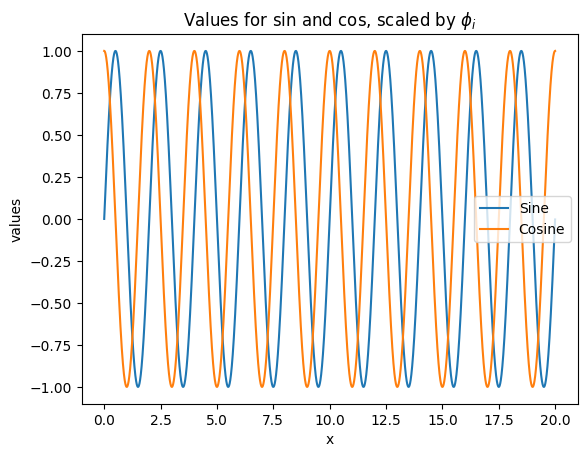

In [ ]:
x_values = np.arange(0, 20, 0.001)

draw_simple_sin_cos(x_values)
plt.show()

You can adjust figure size for aspect ratio then DPI for density of pixels. These combined give you resolution of the image

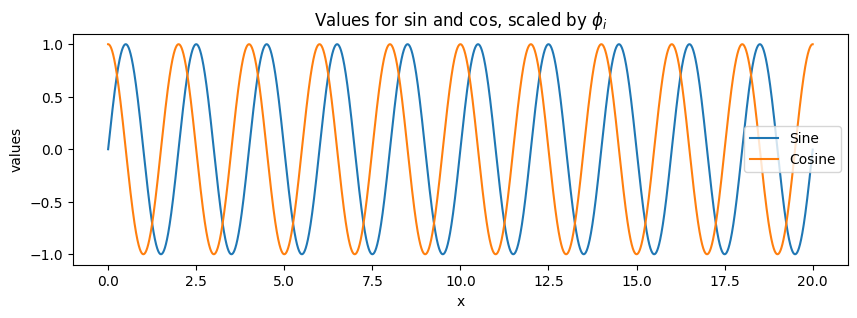

In [ ]:
plt.figure(figsize=(10,3), dpi=100) # 640 x 450

draw_simple_sin_cos(x_values)

plt.savefig('tutorial_sin.jpg')
plt.show()

Subplots in a grid can share axis labels through *sharex* and *sharey*.

In [ ]:
def draw_subplot_sin_cos(index, x_values, ax):

    y1_values = np.sin(x_values * np.pi)
    y2_values = np.cos(x_values * np.pi)

    ax.plot(x_values, y1_values, c='r', label='Sine')
    ax.scatter(x_values, y2_values, s=4, label='Cosine')

    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('values')
    ax.set_title(f'Values for sin and cos (Subplot #{index})')

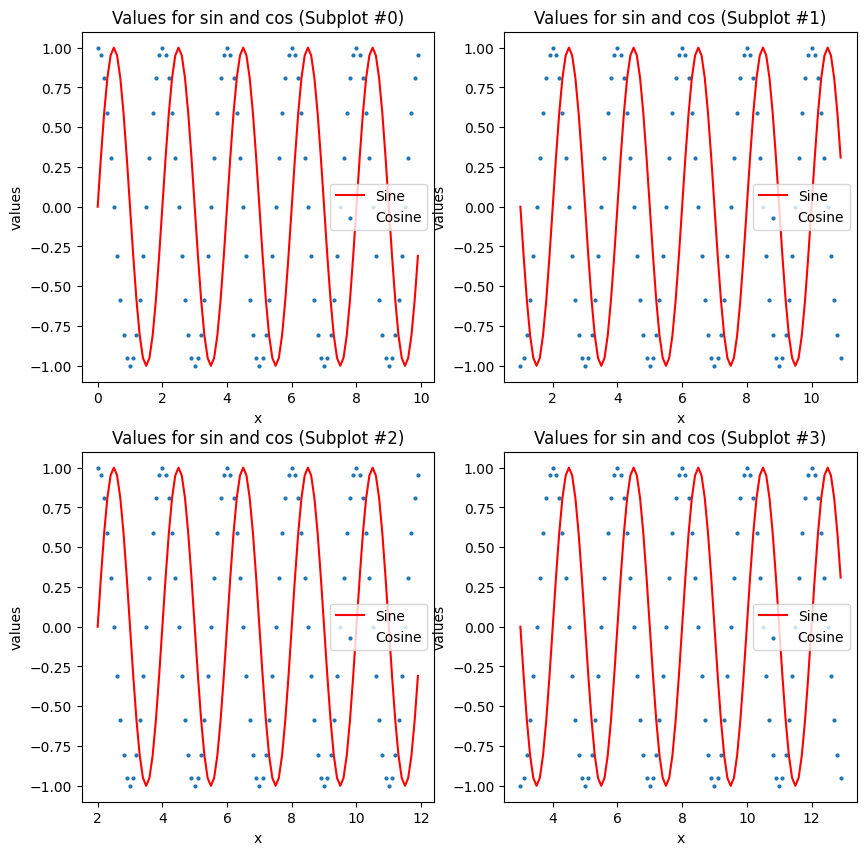

In [ ]:
fig, ax_list = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
#fig, ax_list = plt.subplots(nrows=2, ncols=2,
#                            sharex='col', sharey='row',
#                            figsize=(10, 10))

i = 0
for r, row in enumerate(ax_list):
    for c, ax in enumerate(row):
        x_values = np.arange(i, i + 10, 0.1)
        draw_subplot_sin_cos(i, x_values, ax)
        i += 1

plt.show()

## Confusion matrix

Here we show plotting confusion matrix from scratch. For a pre-built one, see [implementation by scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

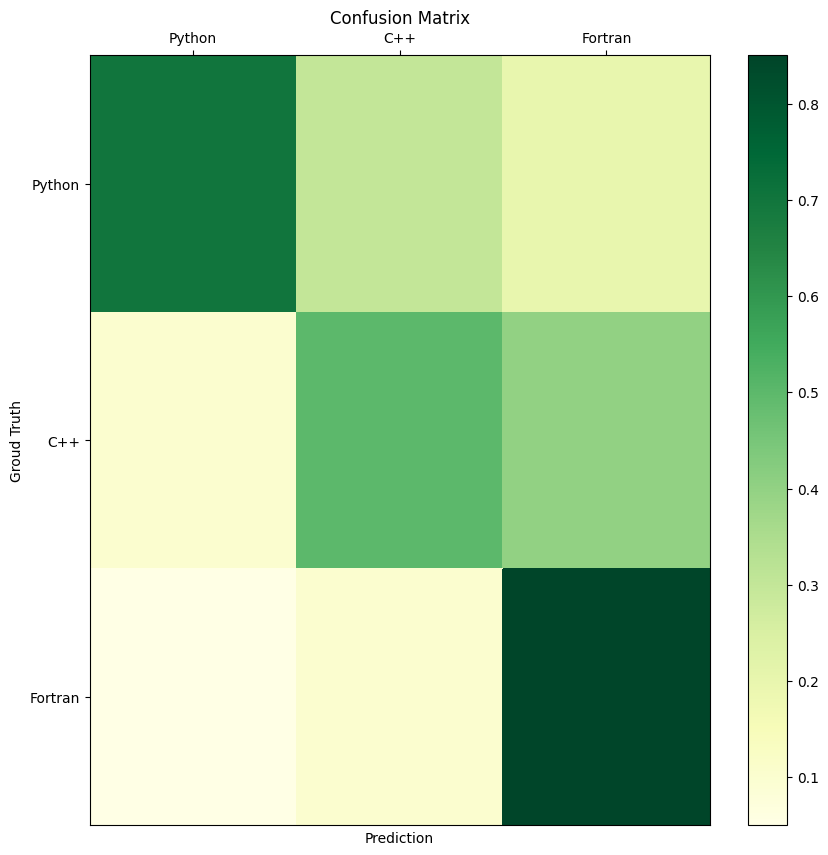

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

color='YlGn'

labels = ['Python', 'C++', 'Fortran']

cm = np.array([[0.7, 0.3, 0.2], [0.1, 0.5, 0.4], [0.05, 0.1, 0.85]])
heatmap = ax.pcolor(cm, cmap=color)
fig.colorbar(heatmap)
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_title('Confusion Matrix')
ax.set_xlabel('Prediction')
ax.set_ylabel('Groud Truth')

ax.set_xticks(np.arange(cm.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(cm.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

### Show image

When showing images, remember to tell numpy the range of pixel values. Typically pixel values are either *0-1* or *0-255*.

(256, 256)


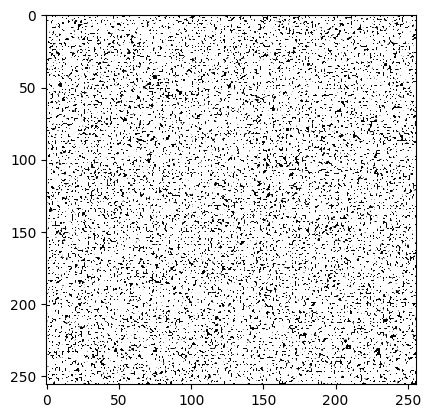

In [ ]:
img_arr = np.random.random((256, 256))# 0 -> 1
print(img_arr.shape)

plt.imshow(img_arr, cmap='gray', vmin=0.2, vmax=0.25)
plt.show()

By default numpy goes channel first.

(256, 256, 3)


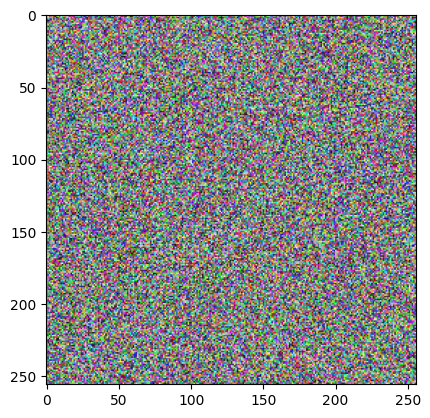

In [ ]:
img_arr = np.random.random((256, 256, 3))# R, C, (RGB)
print(img_arr.shape)

plt.imshow(img_arr, vmin=0, vmax=1)
plt.show()

Remember to move axis around if you want to use the default plotting tool.

(3, 256, 256)
(256, 256, 3)


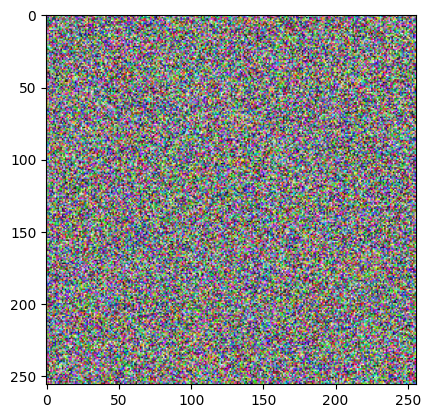

In [ ]:
img_arr = np.random.random((3, 256, 256))# (RGB) R C
print(img_arr.shape)

img_arr = np.moveaxis(img_arr, 0, -1)
print(img_arr.shape)

plt.imshow(img_arr, vmin=0, vmax=1)
plt.show()

In [ ]:
import imageio

fname = 'tutorial_sin.jpg'
img = imageio.imread(fname)

print(img.shape)

(300, 1000, 3)


<ipython-input-93-617eff8ea62d>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(fname)


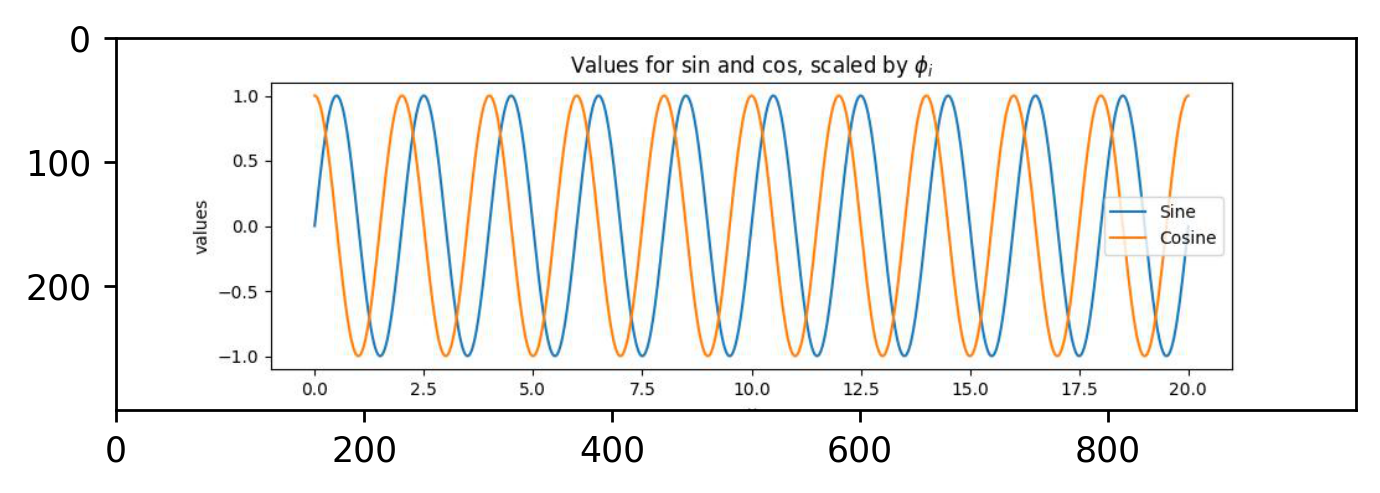

In [ ]:
plt.figure(dpi=250)   # dpi=500 -> larger
plt.imshow(img, vmin=0, vmax=10000, interpolation='bilinear')
plt.show()

## Pandas

Pandas is great data processing library for table/database-like data. Excellent for things that come in or you wish to output as CSV/Excel. Part of the following content is inspired by [a Pandas tutorial online](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/).


### File operations

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('sample_data/california_housing_test.csv')

data_short = data[:20]

In [ ]:
data_short

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


You can get basic statiscis with little effort like this

In [ ]:
print(data_short['longitude'].describe())     # For one column

data_short.describe()                   # For the entire dataframe

count     20.000000
mean    -119.722500
std        1.812695
min     -122.840000
25%     -121.257500
50%     -119.340000
75%     -118.185000
max     -117.030000
Name: longitude, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20.000000,20.00000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,-119.722500,35.73450,29.700000,2157.65000,389.200000,1160.25000,372.950000,3.838320,196935.000000
std,1.812695,1.94388,9.776987,1972.59656,304.357062,863.64167,291.955562,1.777148,99282.845685
min,-122.840000,32.97000,15.000000,67.00000,15.000000,49.00000,11.000000,1.663500,58300.000000
25%,-121.257500,33.94000,24.250000,999.75000,192.500000,594.00000,191.750000,2.301325,134375.000000
50%,-119.340000,35.66500,27.500000,1550.00000,279.500000,1033.50000,269.000000,3.412000,178900.000000
75%,-118.185000,37.41000,37.000000,3077.75000,609.500000,1497.25000,596.000000,5.732425,257075.000000
max,-117.030000,38.69000,45.000000,8814.00000,1307.000000,3450.00000,1258.000000,6.608500,414300.000000


See [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) for parameters of *to_csv* function.

In [ ]:
data_short.to_csv('data_short_w_indx.csv', index=False)

### Manipulations

Columns can be selected and filtered based on value/name. Be careful with binary operation for filtering due to order of execution. Bitwise operations takes precedence over boolean.

In [ ]:
data_short[['housing_median_age', 'total_rooms']]

,housing_median_age,total_rooms
0,27.0,3885.0
1,43.0,1510.0
2,27.0,3589.0
3,28.0,67.0
4,19.0,1241.0
5,37.0,1018.0
6,43.0,1009.0
7,19.0,2310.0
8,15.0,3080.0
9,31.0,2402.0


In [ ]:
data_short[data_short['housing_median_age']==27]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
14,-117.97,33.73,27.0,2097.0,325.0,1217.0,331.0,5.7121,222500.0


In [ ]:
data_short[(data_short['housing_median_age'] > 20) & (data_short['total_rooms'] < 1000)]       # Use & | instead of and/or. Put brackets around

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
10,-118.24,33.98,45.0,972.0,249.0,1288.0,261.0,2.2054,125000.0
11,-119.12,35.85,37.0,736.0,166.0,564.0,138.0,2.4167,58300.0
15,-117.99,33.81,42.0,161.0,40.0,157.0,50.0,2.2000,153100.0


A filter function can be applied to generate a new column (you can use this to apply a trained model for prediction result).

We can add column based on filter/conditions.

In [ ]:
def filter_func(row):

    if row['x_1'] == 1.0 and row['x_2'] == 0.0:
        return row['y'] * 10

    return -1

data_short['new_column'] = data_short[['x_1', 'x_2', 'y']].apply(filter_func, axis=1)

data_short

Iterating through Pandas rows can be done as follows. Each row is a "dictionary". Adding data directly via a list of values is also valid.

In [ ]:
col2 = []
for i, row in data_short.iterrows():
    print(f'Row {i}: y-value: {row["y"]}')
    col2.append(row['y'] ** 2)

data_short['col_2'] = col2
data_short

Not a great example here, but *loc* means index by value, *iloc* means index by index. For example, you can do iloc by -1, but NOT loc by -1.

In [ ]:
print(data.loc[19])
print(data.iloc[-1])

### Create dataframe

You can create dataframe from dictionary in row or column major manner. Notice that "extra" things will be filled with *Nan*.

In [ ]:
data_list = [{'a': i, 'b': i + 1} for i in range(15)]
data_list[5] = {'a': 10, 'b': 9, 'c': -1}

df = pd.DataFrame(data_list)
df

Dataframe can also be created from 2D array. Naming the rows and columns is a good practice.

In [ ]:
data_2d = np.array([i for i in range(50)]).reshape(5, 10)

df = pd.DataFrame(data_2d, columns=[f'col {i}' for i in range(10)], index=[f'row {i}' for i in range(5)])
df

Similarly, you can create dataframe directly from dictionary. It also supports whether the dicionary keys are row/col indices.

In [ ]:
data_dict = {'col 1': [3, 2, 1, 0],
        'col 2': ['a', 'b', 'c', 'd']}

df = pd.DataFrame.from_dict(data_dict)
df

In [ ]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df

### Simple plotting

Pandas also support plotting. The images it generates are the same style as those in Matplotlib. Pandas plotting provides a quick way to visualize, while you might still need to resort to Matplotlib for more formal plots with higher flexibility.

In [ ]:
data.plot(kind='scatter', x='x_3', y='y', title='Plot of Data');

In [ ]:
data['y'].plot(kind='hist', title='Y');

In [ ]:
data.boxplot(column='x_3', by='y');

In [ ]:
data.to_numpy()

In [ ]:
plt.scatter(data['x_1'], data['y'])

In [ ]:
from sklearn.linear_model import LinearRegression

data_short


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


In [ ]:
X = data_short[['total_rooms', 'total_bedrooms']]
X

,total_rooms,total_bedrooms
0,3885.0,661.0
1,1510.0,310.0
2,3589.0,507.0
3,67.0,15.0
4,1241.0,244.0
5,1018.0,213.0
6,1009.0,225.0
7,2310.0,471.0
8,3080.0,617.0
9,2402.0,632.0


In [ ]:
y = data_short['median_house_value']
y

0     344700.0
1     176500.0
2     270500.0
3     330000.0
4      81700.0
5      67000.0
6      67000.0
7     166900.0
8     194400.0
9     164200.0
10    125000.0
11     58300.0
12    252600.0
13    231200.0
14    222500.0
15    153100.0
16    181300.0
17    137500.0
18    300000.0
19    414300.0
Name: median_house_value, dtype: float64

In [ ]:
reg = LinearRegression().fit(X, y)

In [ ]:
reg.score(X, y)

0.515112124132515

In [ ]:
reg.coef_

array([ 110.82343136, -540.51955201])

In [ ]:
reg.intercept_

168187.0329705607

In [ ]:
reg.predict(np.array([[3000, 500]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([230397.55104248])